In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.api as sm
#Metrics
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

In [19]:
#2
import numpy as np
int64_bool = df.apply(lambda x: (True if x.dtype == np.int64 else False),axis = 0)
df = df[df.columns[int64_bool]]


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_8188\938917052.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(eliminate, 1, inplace=True)


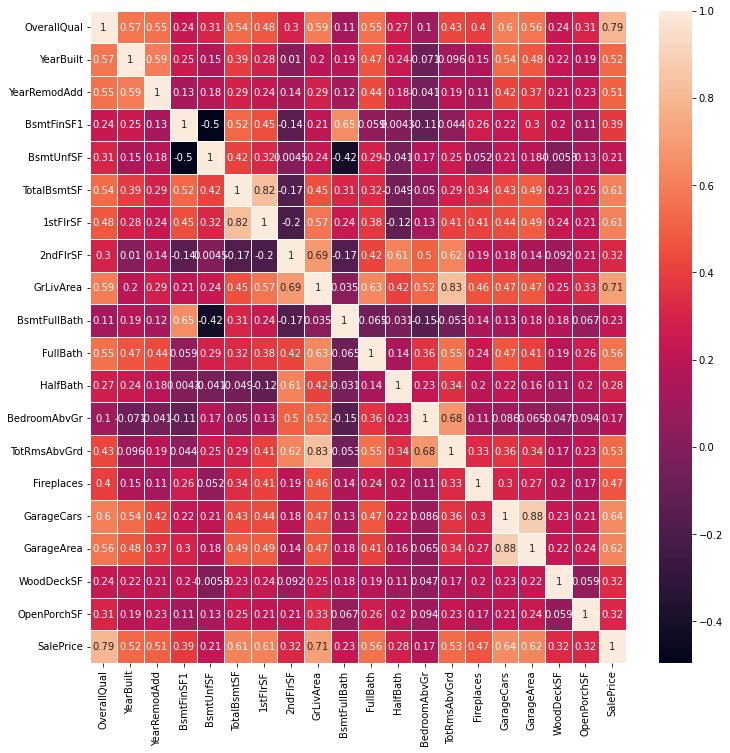

In [20]:
#2
import matplotlib.pyplot as plt

eliminate = ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df.drop(eliminate, 1, inplace=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [21]:
corrMatrix

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.507101
BsmtFinSF1,0.239666,0.249503,0.128451,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,0.308159,0.149040,0.181133,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.288886,-0.041118,0.166643,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,0.214479
TotalBsmtSF,0.537808,0.391452,0.291066,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,0.605852
2ndFlrSF,0.295493,0.010308,0.140024,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.319334
GrLivArea,0.593007,0.199010,0.287389,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,0.708624
BsmtFullBath,0.111098,0.187599,0.119470,0.649212,-0.422900,0.307351,0.244671,-0.169494,0.034836,1.000000,-0.064512,-0.030905,-0.150673,-0.053275,0.137928,0.131881,0.179189,0.175315,0.067341,0.227122


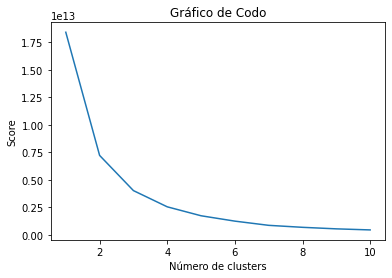

In [22]:
import pyclustertend
import sklearn.cluster as cluster
df.dropna()
dfarray = df[['SalePrice', 'SalePrice']].values
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dfarray)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

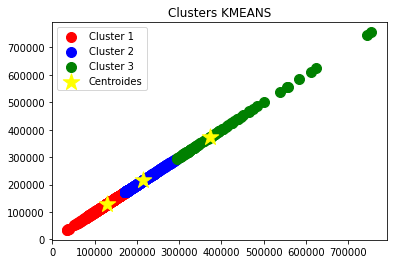

In [23]:
km = cluster.KMeans(n_clusters=3).fit(dfarray)
centroides = km.cluster_centers_
especies = km.predict(dfarray)
plt.scatter(dfarray[especies == 0, 0], dfarray[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(dfarray[especies == 1, 0], dfarray[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(dfarray[especies == 2, 0], dfarray[especies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Clusters KMEANS")
plt.legend()
plt.show()

In [24]:
# Numero 4
minPrice = df['SalePrice'].min()
maxPrice = df['SalePrice'].max()
avg = (maxPrice - minPrice) / 3
df['Clasificacion'] = df['SalePrice']

df['Clasificacion'][df['SalePrice'] < minPrice + avg] = 0
df['Clasificacion'][df['SalePrice'] >= minPrice + avg] = 1
df['Clasificacion'][df['SalePrice'] >= minPrice + avg * 2] = 2
df

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Clasificacion
0,7,2003,2003,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,208500,0
1,6,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,181500,0
2,7,2001,2002,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,223500,0
3,7,1915,1970,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,140000,0
4,8,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0,953,953,953,694,1647,0,2,1,3,7,1,2,460,0,40,175000,0
1456,6,1978,1988,790,589,1542,2073,0,2073,1,2,0,3,7,2,2,500,349,0,210000,0
1457,7,1941,2006,275,877,1152,1188,1152,2340,0,2,0,4,9,2,1,252,0,60,266500,0
1458,5,1950,1996,49,0,1078,1078,0,1078,1,1,0,2,5,0,1,240,366,0,142125,0


In [25]:
df['Cara'] = df['Clasificacion']
df['Cara'][df['Clasificacion'] == 2] = 1
df['Cara'][df['Clasificacion'] != 2] = 0
df['Media'] = df['Clasificacion']
df['Media'][df['Clasificacion'] == 1] = 1
df['Media'][df['Clasificacion'] != 1] = 0
df['Economica'] = df['Clasificacion']
df['Economica'][df['Clasificacion'] == 0] = 1
df['Economica'][df['Clasificacion'] != 0] = 0
df

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Clasificacion,Cara,Media,Economica
0,7,2003,2003,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,208500,0,0,0,1
1,6,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,181500,0,0,0,1
2,7,2001,2002,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,223500,0,0,0,1
3,7,1915,1970,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,140000,0,0,0,1
4,8,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,250000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0,953,953,953,694,1647,0,2,1,3,7,1,2,460,0,40,175000,0,0,0,1
1456,6,1978,1988,790,589,1542,2073,0,2073,1,2,0,3,7,2,2,500,349,0,210000,0,0,0,1
1457,7,1941,2006,275,877,1152,1188,1152,2340,0,2,0,4,9,2,1,252,0,60,266500,0,0,0,1
1458,5,1950,1996,49,0,1078,1078,0,1078,1,1,0,2,5,0,1,240,366,0,142125,0,0,0,1


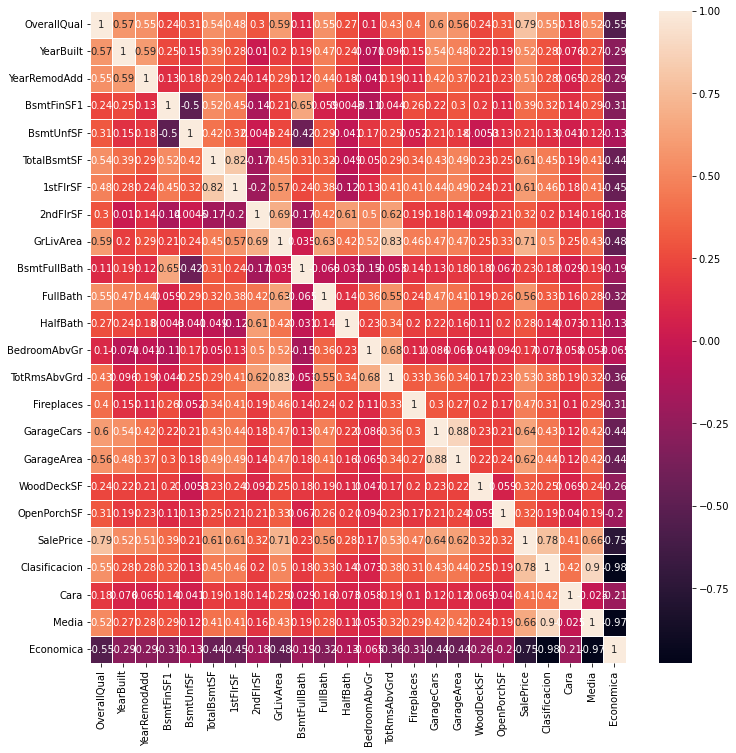

In [26]:
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [27]:
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [28]:
calculate_vif(df=df, features=['Cara', 'SalePrice', 'GrLivArea', 'OverallQual'])

Mulitcoleanalidad de variable CARA


,VIF,Tolerance
Cara,1.300378,0.769007
SalePrice,4.264265,0.234507
GrLivArea,2.025104,0.493802
OverallQual,2.888613,0.346187


In [29]:
calculate_vif(df=df, features=['Media', 'SalePrice', 'GrLivArea', 'OverallQual'])

Mulitcoleanalidad de variable INTERMEDIA


,VIF,Tolerance
Media,1.791565,0.558171
SalePrice,4.420400,0.226224
GrLivArea,2.029901,0.492635
OverallQual,2.686549,0.372225


In [30]:
print('Mulitcoleanalidad de variable CARA ', calculate_vif(df=df, features=['Economica', 'SalePrice', 'GrLivArea', 'OverallQual']))
print('Mulitcoleanalidad de variable INTERMEDIA ', calculate_vif(df=df, features=['Economica', 'SalePrice', 'GrLivArea', 'OverallQual']))
print('Mulitcoleanalidad de variable ECONOMICA ', calculate_vif(df=df, features=['Economica', 'SalePrice', 'GrLivArea', 'OverallQual']))
calculate_vif(df=df, features=['Economica', 'SalePrice', 'GrLivArea', 'OverallQual'])

Mulitcoleanalidad de variable ECONOMICA


,VIF,Tolerance
Economica,2.290518,0.436582
SalePrice,5.286043,0.189177
GrLivArea,2.037470,0.490805
OverallQual,2.707813,0.369302


In [31]:
# Numero 5 y 6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import random

df = df.drop('SalePrice', axis = 1)
df['Clasificacion'] = df['Clasificacion'].astype('category')
clasificacion = df.pop('Clasificacion') 
caras = df.pop('Cara') 
medias = df.pop('Media') 
economicas = df.pop('Economica') 

Y = caras
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7, random_state=69)
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas caras\n', cm)
print('Accuracy score: ', accuracy)
print('Presicion score: ', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

Matriz de confusión para detectar casas caras
 [[435   2]
 [  1   0]]
Accuracy score:  0.9931506849315068
Presicion score:  0.9931506849315068
Recall score:  0.9931506849315068
F1 score:  0.9931506849315068


In [32]:
Y = medias
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7, random_state=69)
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas Intermedias\n',cm)
print('Accuracy score: ', accuracy)
print('Presicion score: ', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

Matriz de confusión para detectar casas Intermedias
 [[384   7]
 [ 15  32]]
Accuracy score:  0.9497716894977168
Presicion score:  0.9497716894977168
Recall score:  0.9497716894977168
F1 score:  0.9497716894977168


In [33]:
Y = economicas
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7, random_state=69)
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X)[:,1]
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para detectar casas Economicas\n',cm)
print('Accuracy score: ', accuracy)
print('Presicion score: ', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

Matriz de confusión para detectar casas Economicas
 [[ 38  10]
 [  3 387]]
Accuracy score:  0.9703196347031964
Presicion score:  0.9703196347031964
Recall score:  0.9703196347031964
F1 score:  0.9703196347031964
